In [48]:
import sys
sys.path.append("..")
from allthethings import PyNetwork, PyPipe_ps
from allthethings import PyBC_opt_dh
import numpy as np
import matplotlib.pyplot as plt
%pylab inline


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [49]:
fi = "../indata/7deSeptiembre.inp"
fc = "../indata/7deSeptiembre.config"
mtype = 1
kw = .45
n1 = PyNetwork(fi,fc,mtype)
Q0 = np.ones(n1.M+1); 
#for i in range(n1.M/2,n1.M+1):
#    Q0[i] = 0
M = n1.M
#n1.setbVal(0,Q0)

Clvals0 = np.ones(M+1)
Clvals0 = np.zeros(M+1)
for i in range(1,sum(n1.nodeTypes==1)):
    n1.setClbVal(i,Clvals0)
n1.setClbVal(0,Clvals0)
n1.setCl0(0,np.ones(n1.Ns[0]))
n1.setCl0(0,np.ones(n1.Ns[1]))
for i in range(2, n1.Nedges):
    n1.setCl0(i,np.zeros(n1.Ns[i]))
    n1.setClkw(i,kw)


In [50]:
dt = n1.T/n1.M
V0 = n1.getTotalVolume()
n1.runForwardProblem(dt)


In [51]:
print "T = %f" %n1.T
print "Solve time = %f" %n1.solve_time
print "dt = %f" %dt
print sum(n1.nodeTypes==1)
print n1.nodeTypes

T = 1200.000000
Solve time = 146.968260
dt = 0.054545
5
[1 2 2 3 3 3 1 2 3 1 2 3 1 1]


In [52]:
def idx_t(i,j,n,N):
    return (2*(N+2)*n+(N+2)*i+j)

2186.8861064
1751.58241772
14
[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
113.681043826
dx/dt = 183.333333


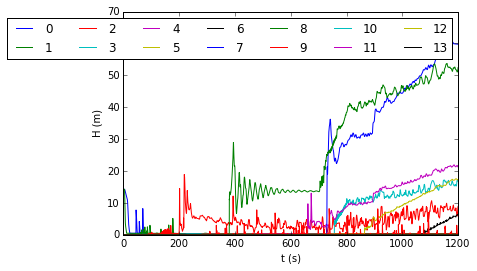

In [53]:
#show time series at a sensor in the middle of each pipe in the network
print n1.getTotalVolume()-V0
print V0
print n1.Nedges
print n1.a
print max(n1.cmax)
mdx = min([n1.Ls[i]/n1.Ns[i] for i in range(n1.Nedges)])
T = n1.T
M = n1.M
dt = T/M
print "dx/dt = %f" % (mdx/dt)
pipes = [PyPipe_ps(n1.Ns[i], n1.Ds[i], n1.Ls[i], n1.M, n1.a[i]) for i in range(n1.Nedges)]
t = linspace(0,T,M+1)
for i in range(0,14):
    qhist = n1.qhist(i)
    P = [pipes[i].pbar(qhist[idx_t(0,n1.Ns[i]/2,n, n1.Ns[i])],False) for n in range(M+1)]
    plot(t,P) 
    legend(['%d'%i for i in range(n1.Nedges)], ncol=7)
ax = gca()
ax.set_xlabel('t (s)')
ax.set_ylabel('H (m)')

(22001, 13)
(0, 107)


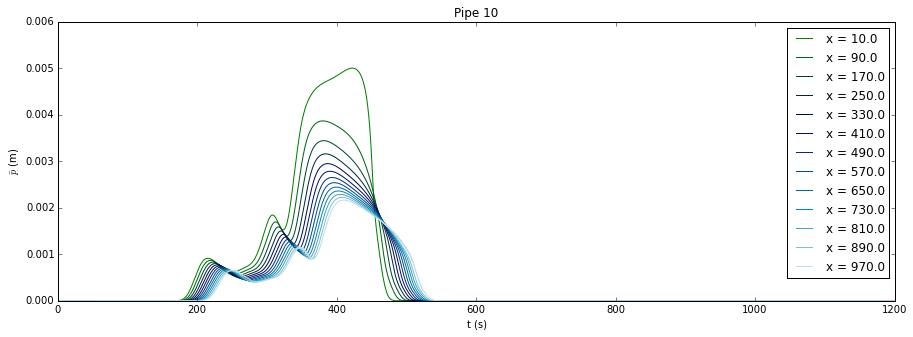

In [54]:
#show time series at different sensors along the length of a single pipe
i = 10
M = n1.M
from matplotlib import cm
import matplotlib.colors as colors
fig = figure(figsize= (15,5))
qhist = n1.qhist(i)
xs = np.arange(1,n1.Ns[i]+1,8)
#set_clim(0,xs[-1])
t = np.linspace(0,n1.T,M+1)
P = np.zeros((len(t),len(xs)))
print shape(P)
SHIT = cm.get_cmap('ocean') 
cNorm  = colors.Normalize(vmin=0, vmax=xs[-1]+10)
scalarMap = cm.ScalarMappable(norm=cNorm, cmap=SHIT)
print scalarMap.get_clim()
dx= n1.Ls[i]/n1.Ns[i]
for J in range(len(xs)):
    #P[:,J]=[pipes[i].pbar(qhist[idx_t(0,xs[J],n, n1.Ns[i])],False) for n in range(M+1)]
    cval = scalarMap.to_rgba(xs[J])
    P =[pipes[i].pbar(qhist[idx_t(0,xs[J],n, n1.Ns[i])],False) for n in range(M+1)]
    q=plot(t,P,color =cval,label="x = %.1f"%(dx*xs[J]))
    
ax = gca()
ax.set_title('Pipe %d'%i)
ax.set_xlabel('t (s)')
ax.set_ylabel(r'$\bar{p}$ (m)')
legend()
savefig("../sensors_pipe%d.eps"%i, format='eps')

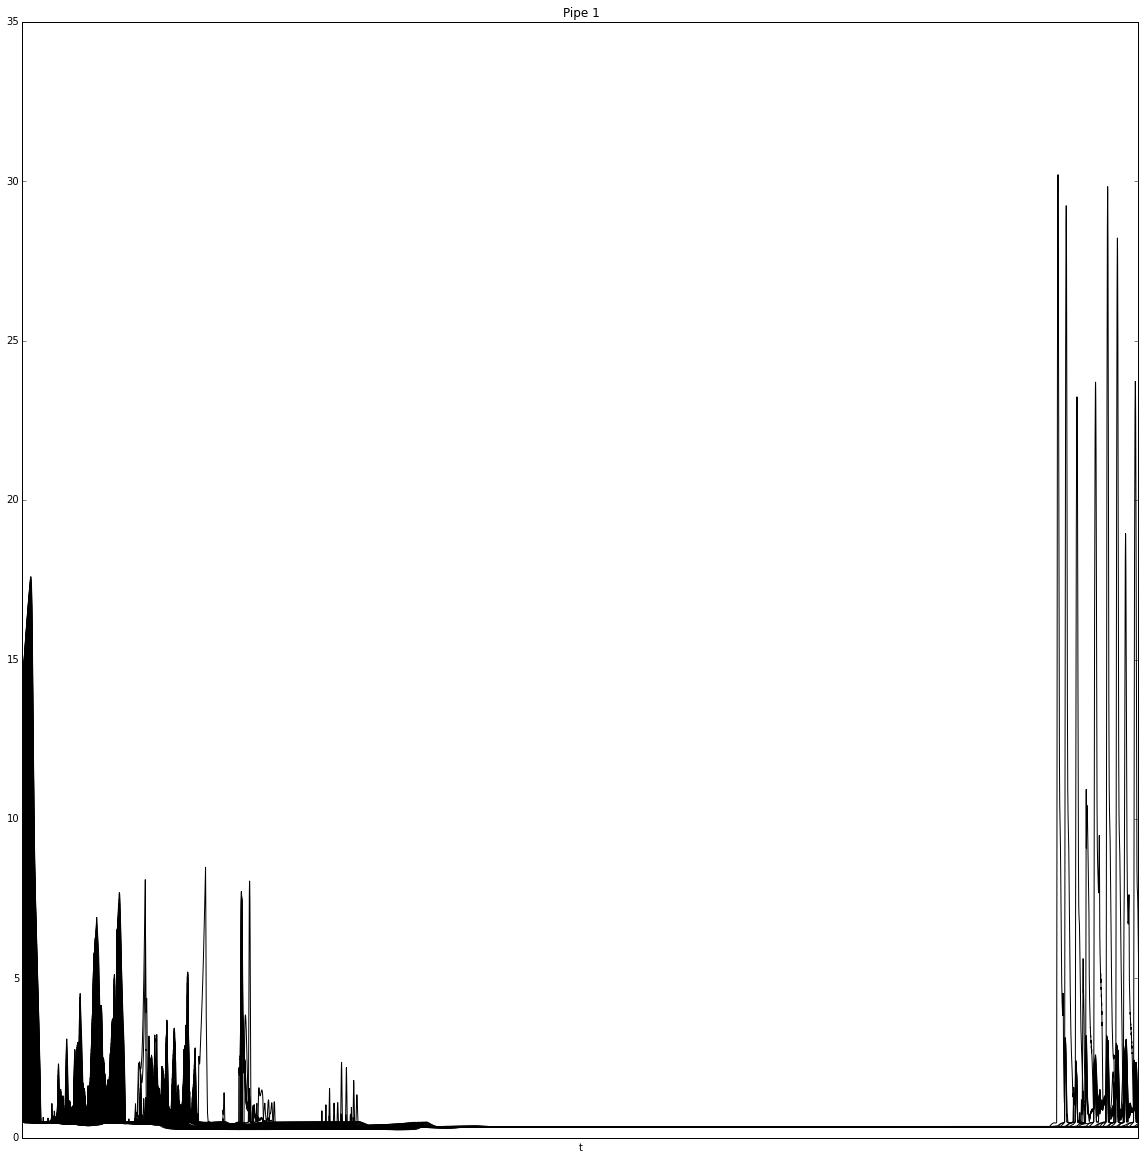

In [55]:
i = 1
M = n1.M
fig = figure(figsize= (20,20))
#for i in range(10,11):
for J in range(1,n1.Ns[i]):
#        subplot(14,1,i)
        qhist = n1.qhist(i)
        P = [pipes[i].pbar(qhist[idx_t(0,J,n, n1.Ns[i])],False) for n in range(M+1)]
        plot(t,P,'k')
        ax = gca()
        ax.set_title('Pipe %d'%i)
        ax.set_xticks([])
ax.set_xlabel('t')
#savefig("../blargh.eps", format = 'eps')

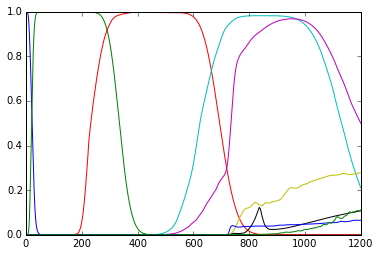

In [62]:

t = linspace(0,T,M+1)
for k in range(9):
    j = 5
    M = n1.M
    N = n1.Ns[k]
    Clh = n1.Clhist(k)
    Clj = Clh[j::N+2]
    plot(t,Clj[0:-1])

In [73]:
Clh = n1.Clhist(13)
print len(find(Clh>1000000))

42827


5.36358429482e+159


In [59]:
print n1.nodeTypes
c = n1.conn
print "edge node1 node2"
for i in range(len(c)):
    print "%d     %d     %d"%(i,c[i][0],c[i][1])

[1 2 2 3 3 3 1 2 3 1 2 3 1 1]
edge node1 node2
0     0     1
1     1     2
2     2     3
3     3     4
4     4     5
5     5     7
6     7     8
7     5     6
8     4     9
9     3     8
10     8     10
11     10     11
12     11     12
13     11     13
